<h2><center><font color = "red">Analysis</font></center></h2>

<h2><center><font color = "red">A Countrywide Traffic Accident Dataset (2016 - 2020)</font></center></h2>

<h3><font color = "green">Key Facts</font></h3>

* Approximately 1.3 million people die each year as a result of road traffic crashes.
* Between 20 and 50 million more people suffer non-fatal injuries, with many incurring a disability as a result of their injury.
* Road traffic injuries are the leading cause of death for children and young adults aged 5-29 years.
* Road traffic crashes cost most countries 3% of their gross domestic product.
* More than half of all road traffic deaths are among vulnerable road users: pedestrians, cyclists, and motorcyclists.


<h3><font color = "green">Dataset Description</font></h3>

This is a countrywide car accident dataset, which covers <b>49 states</b> of the USA. The accident data are collected <b>from February 2016 to Dec 2020</b>, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road networks. Currently, there are about <b>1.5 million</b> accident records in this dataset. Check here to learn more about this dataset.

<h3><font color = "green">Acknowledgements</font></h3>


* Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, 2019.
<br></br>
* Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. "Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights." In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.

<h3><font color = "green">Research Questions</font></h3>

1. Which States, Cities and Streets have the most traffic accidents?
2. What is the time of the day, the day of the week and the month with the higher number of accidents?
3. How many accidents per year? And what is the trend, increasing or decreasing?
4. What are the most common weather conditions on the days of the accidents and how they affect the accidents?
5. How many accidents have a severity level of 1, 2, 3 and 4?

<h2><font color = "red">Start Analysis</font></h2>

<h3><font color = "green">Load Necessary Libraries</font></h3>

In [3]:
%matplotlib inline
# important libraries
from IPython.display import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import os

# display all features
pd.set_option("display.max_columns", None)

# matplotlib settings
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)
mpl.rc('axes', labelsize=15)


# remove the top and right axis
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

warnings.filterwarnings(action="ignore")

<h3><font color = "green">Load and Display Dataset</font></h3>

In [4]:
DATASETS_file = "../preprocessing"
csv_file = "accidents_df_preproced.csv"

csv_file_path = os.path.join(DATASETS_file, csv_file)
accidents_df = pd.read_csv(filepath_or_buffer=csv_file_path)

print(f"accidents_df shape:\t{accidents_df.shape}")
accidents_df.head()

accidents_df shape:	(1370980, 49)


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Street,Side,City,County,State,Zipcode,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_Day_Week,Start_Month,Start_Date,Start_Hour,Start_Year
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Outerbelt E,1,Dublin,Franklin,OH,43017,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,2,2016-02-08,0,2016
1,A-2716605,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,I-75 S,1,Cincinnati,Hamilton,OH,45217,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,1,1,1,1,0,2,2016-02-08,7,2016
2,A-2716606,2,2016-02-08 08:16:57,2016-02-08 14:16:57,39.063240,-84.032430,39.067310,-84.058510,1.427,State Route 32,1,Williamsburg,Clermont,OH,45176,US/Eastern,KI69,2016-02-08 08:16:00,35.6,29.2,100.0,29.66,10.0,WSW,8.1,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,1,1,1,1,0,2,2016-02-08,8,2016
3,A-2716607,2,2016-02-08 08:16:57,2016-02-08 14:16:57,39.067080,-84.058550,39.063020,-84.032540,1.423,State Route 32,1,Batavia,Clermont,OH,45103,US/Eastern,KI69,2016-02-08 08:16:00,35.6,29.2,100.0,29.66,10.0,WSW,8.1,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,1,1,1,1,0,2,2016-02-08,8,2016
4,A-2716608,2,2016-02-08 08:15:41,2016-02-08 14:15:41,39.775650,-84.186030,39.772750,-84.188050,0.227,I-75 S,1,Dayton,Montgomery,OH,45404,US/Eastern,KFFO,2016-02-08 08:18:00,33.8,NaN,100.0,29.63,3.0,SW,2.3,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,1,1,1,1,0,2,2016-02-08,8,2016


<h3><font color = "green">Exploratory Data Analysis</font></h3>

<h4><font color = "orange">Analysis of some general and usefull characteristics of traffic accidents observations.</font></h4>

##### Severity

Severity is one of the most important features as it shows the severity of each accident depending on the impact it has on road traffic. It takes a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).

In [5]:
severity = accidents_df["Severity"].value_counts().sort_index()
severity

1      27574
2    1105831
3     141256
4      96319
Name: Severity, dtype: int64

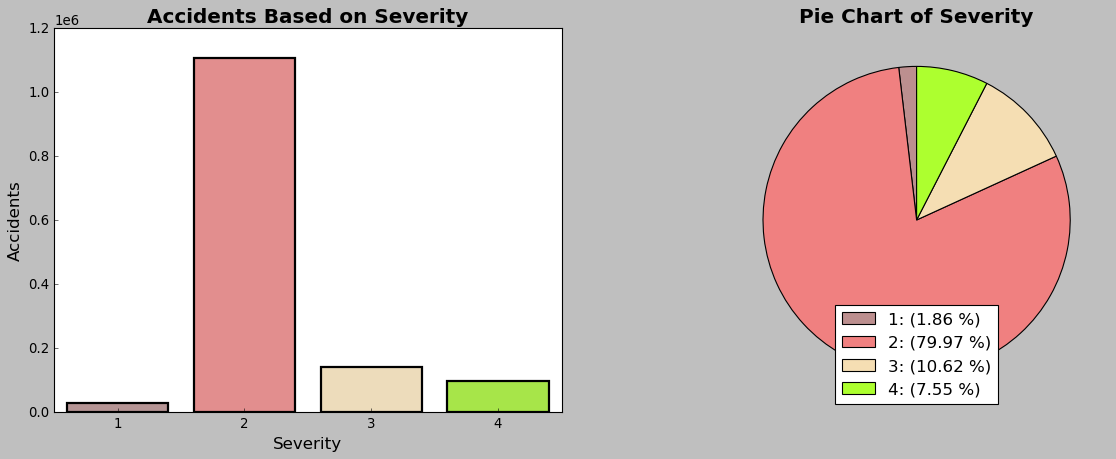

In [6]:
plt.style.use("classic")
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
colors = ["rosybrown", "lightcoral", "wheat", "greenyellow"]

# build the barplot
sns.barplot(x=severity.index, y=severity.values, edgecolor="black", linewidth=2, ax=ax[0], palette=colors)

ax[0].set_title(label="Accidents Based on Severity", fontdict={"fontsize": 18, "weight": "bold"})
ax[0].set_ylabel(ylabel="Accidents", fontdict={"fontsize": 15})
ax[0].set_xlabel(xlabel="Severity", fontdict={"fontsize": 15})

ax[0].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax[0].tick_params(top=False, right=False)


# build the pie chart
labels = [r"1: (1.86 %)", r"2: (79.97 %)", r"3: (10.62 %)", r"4: (7.55 %)"]
sizes = [1.86, 79.97, 10.62, 7.55]

patches, texts = plt.pie(sizes, colors=colors, startangle=90, wedgeprops={"edgecolor": "black", 'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})
plt.title(label="Pie Chart of Severity", fontdict={"fontsize": 18, "weight": "bold"})
plt.legend(patches, labels, loc="lower center", fontsize=15)
plt.show()

Observations:
* From the above graphs it is clear that there are hardly any accidents with very low severity (severity=1), which is quite unfortunate. The most traffic accidents have severity equal to 2 followed by accidents with severity equal to 3 and then 4.
<br></br>
* For simplicity and for better visualizations we will merge the "Severity" levels. Particularly we will merge the levels 1-2 and the levels 3-4.

##### Timezone

The contiquous United States consists of the 48 adjoining U.S.A states and the District of Columbia one the continent of North America. An important observation is that our dataset exclude the non-contiguous states of Alaska and Hawaii. For these 46 out of 48 states of U.S.A, time is divided into 4 standard timezones (Pacific, Mountain, Central, Eastern) as it is depicted and in the picture below.

In [9]:
# Count observations in each timezone
timezone = accidents_df.Timezone.value_counts()
timezone

US/Eastern     530713
US/Pacific     511228
US/Central     244222
US/Mountain     84817
Name: Timezone, dtype: int64

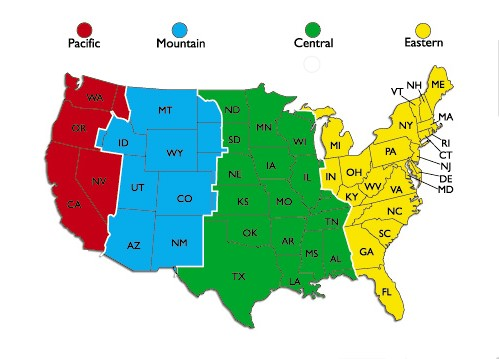

In [11]:
img_path = "../data/timezones.jpg"
Image(filename=img_path, width=500)
# Source -> https://www.prophetic.net/clock.htm

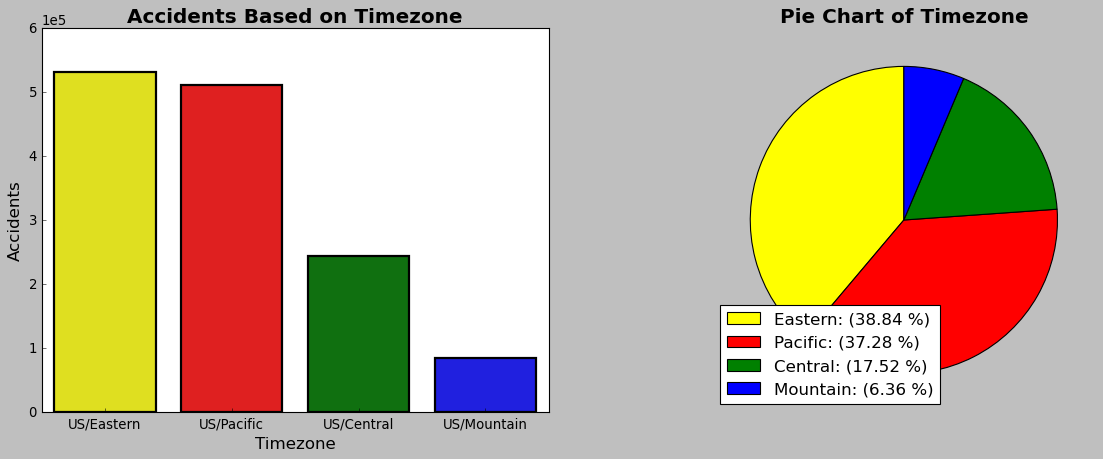

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
colors = ["yellow", "red", "green", "blue"]

# build the barplot
sns.barplot(x=timezone.index, y=timezone.values, edgecolor="black", linewidth=2, ax=ax[0], palette=colors)

ax[0].set_title(label="Accidents Based on Timezone", fontdict={"fontsize": 18, "weight": "bold"})
ax[0].set_ylabel(ylabel="Accidents", fontdict={"fontsize": 15})
ax[0].set_xlabel(xlabel="Timezone", fontdict={"fontsize": 15})
ax[0].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax[0].tick_params(top=False, right=False)


# build the pie chart
labels = [r"Eastern: (38.84 %)", r"Pacific: (37.28 %)", r"Central: (17.52 %)", r"Mountain: (6.36 %)"]
sizes = [38.84, 37.28, 17.52, 6.36]

patches, texts = plt.pie(sizes, colors=colors, startangle=90, wedgeprops={"edgecolor": "black", 'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})

plt.title(label="Pie Chart of Timezone", fontdict={"fontsize": 18, "weight": "bold"})
plt.legend(patches, labels, loc="best", fontsize=15)
plt.show()

Observations:
* We see that most of the accidents have occured within the Eastern and the Pacific Time Zones with a small deviation between them. On the other hand, states within the Mountain Time Zone has the lowest percentage of traffic accidents.

<h4><font color = "orange">Analysis of the number of traffic accidents by location.</font></h4>

##### States

In [13]:
# Find the unique "States" and the number of them 
print(f"number of unique categories for the feature 'State': {accidents_df.State.nunique()}")
accidents_df["State"].unique()

number of unique categories for the feature 'State': 49


array(['OH', 'IN', 'KY', 'WV', 'MI', 'PA', 'CA', 'NV', 'MN', 'TX', 'MO',
       'CO', 'LA', 'KS', 'WI', 'IA', 'MS', 'NE', 'OK', 'ND', 'WY', 'SD',
       'MT', 'NM', 'AR', 'IL', 'NJ', 'GA', 'FL', 'NY', 'CT', 'RI', 'NC',
       'SC', 'MD', 'MA', 'TN', 'VA', 'DE', 'DC', 'ME', 'AL', 'NH', 'VT',
       'AZ', 'UT', 'ID', 'OR', 'WA'], dtype=object)

In [14]:
# Top 20 States with the most number of accidents
acdnts_per_State = accidents_df.groupby(by="State").count().sort_values(by="ID", ascending=False)["ID"][:20]


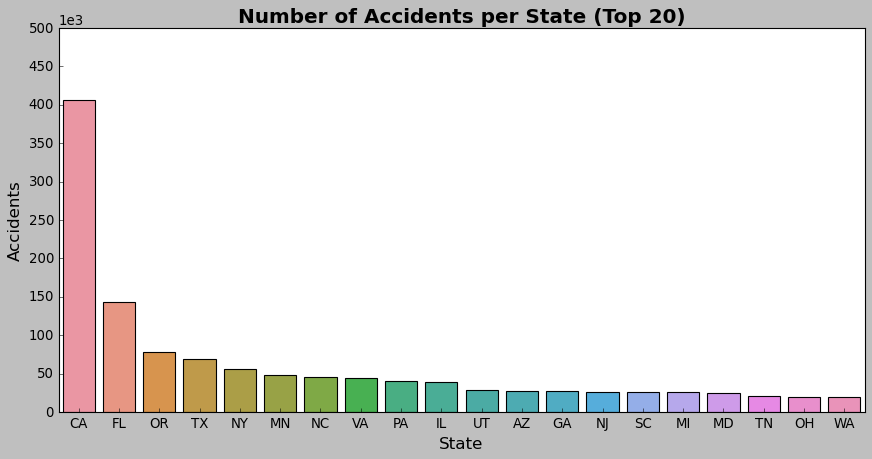

In [15]:
# Barplot
plt.figure(figsize=(13, 6))
sns.barplot(x=acdnts_per_State.index, y=acdnts_per_State.values, edgecolor="black", linewidth=1)

plt.title(label="Number of Accidents per State (Top 20)", fontdict={"fontsize": 18, "weight": "bold"})
plt.ylabel(ylabel="Accidents", fontdict={"fontsize": 15})
plt.xlabel(xlabel="State", fontdict={"fontsize": 15})

plt.yticks(ticks=np.array([tick for tick in range(0, 500001, 50000)]))
plt.ticklabel_format(axis="y", style="sci", scilimits=(3,3))
plt.tick_params(top=False, right=False)
plt.show()

Observations:
* From the above barplot we can see clearly that California (CA) has by far the most traffic accidents. 
* By looking the list of U.S. states by population we can see that California(CA) is the most populated State followed by Texas (TX), Florida(FL) and then New York(NY). So it is reasonable that these States are among the top 5 States with the most accidents.
* Oregon (OR) however, is the 3rd state with the most number of accidents but is the 27th most popoulated state in the USA.

##### Cities

In [16]:
# Find the unique "Cities" and the number of them 
print(f"number of unique categories for the feature 'City': {accidents_df.City.nunique()}")
accidents_df["City"].unique()

number of unique categories for the feature 'City': 10241


array(['Dublin', 'Cincinnati', 'Williamsburg', ..., 'Succasunna',
       'Valleyford', 'American Fork-Pleasant Grove'], dtype=object)

In [17]:
# Top 50 Cities with the most number of accidents
acdnts_per_City = accidents_df.groupby(by="City").count().sort_values(by="ID", ascending=False)["ID"][:50]

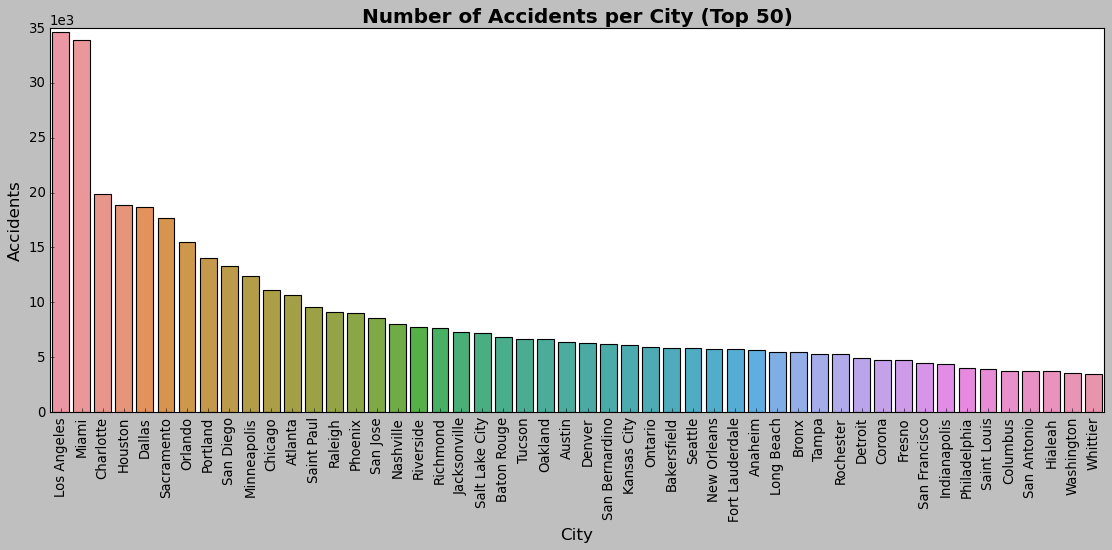

In [18]:
# Barplot
plt.figure(figsize=(17, 6))
sns.barplot(x=acdnts_per_City.index, y=acdnts_per_City.values, edgecolor="black", linewidth=1)

plt.title(label="Number of Accidents per City (Top 50)", fontdict={"fontsize": 18, "weight": "bold"})
plt.ylabel(ylabel="Accidents", fontdict={"fontsize": 15})
plt.xlabel(xlabel="City", fontdict={"fontsize": 15})
plt.xticks(rotation=90)

plt.ticklabel_format(axis="y", style="sci", scilimits=(3,3))
plt.tick_params(top=False, right=False)
plt.show()

Observations:
* Los Angeles belongs to the state of California (CA) and it is within Pacific Timezone. 
* Miami belongs to the state of Florida (FL) and it is within Eastern Timezone.

##### Streets

In [19]:
# Find the unique "Streets" and the number of them 
print(f"number of unique categories for the feature 'Street': {accidents_df.Street.nunique()}")
accidents_df["Street"].unique()

number of unique categories for the feature 'Street': 88394


array(['Outerbelt E', 'I-75 S', 'State Route 32', ..., ' SE Dale Ln',
       ' San Marlo Way', '473-401 Cutoff Rd'], dtype=object)

In [20]:
# Top 10 Streets with the most number of accidents
acdnts_per_Street = accidents_df.groupby(by="Street").count().sort_values(by="ID", ascending=False)["ID"][:20]

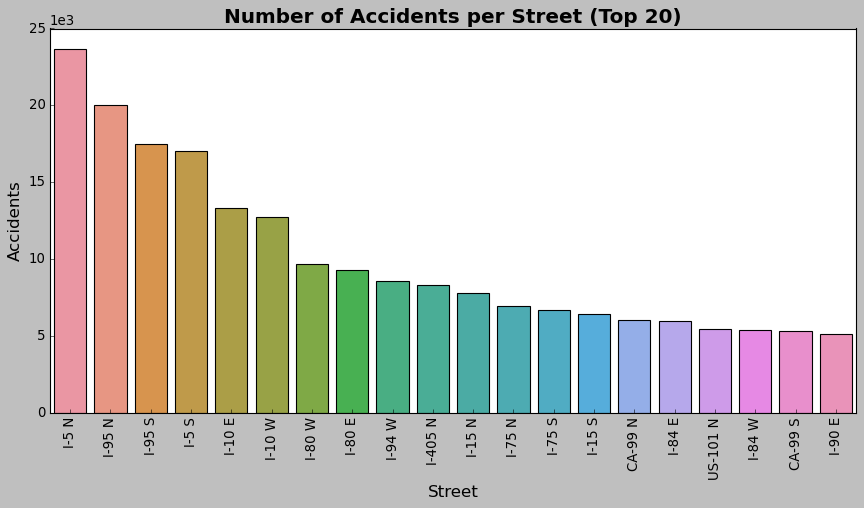

In [21]:
# Barplot
plt.figure(figsize=(13, 6))
sns.barplot(x=acdnts_per_Street.index, y=acdnts_per_Street.values, edgecolor="black", linewidth=1)

plt.title(label="Number of Accidents per Street (Top 20)", fontdict={"fontsize": 18, "weight": "bold"})
plt.ylabel(ylabel="Accidents", fontdict={"fontsize": 15})
plt.xlabel(xlabel="Street", fontdict={"fontsize": 15})
plt.xticks(rotation=90)

plt.ticklabel_format(axis="y", style="sci", scilimits=(3,3))
plt.tick_params(top=False, right=False)
plt.show()

If we search for these streets, we will see that the streets I-5N, I-95N, I-95S and I-5S, which are among the top 5 streets with the most accidents, belongs to areas in U.S.A within either the Eastern Time Zone or the Pacific Time Zone which in turn are Time Zones that include States with the most number of accidents.

<h4><font color = "orange">Analysis of the number of traffic accidents per unit of time (hour, day, month, year) and by level of severity.</font></h4>

##### per Hour of the Day

In [22]:
# Find the total amount of accidents per hour of the Day
tot_acdnts_per_Hour = accidents_df.groupby(by="Start_Hour").count()["ID"]

# Find the amount of accidents per hour of the day and by level of severity
acdnts_per_Hour_1 = accidents_df.loc[accidents_df["Severity"] == 1].groupby(by=["Start_Hour"]).count()["ID"]
acdnts_per_Hour_2 = accidents_df.loc[accidents_df["Severity"] == 2].groupby(by=["Start_Hour"]).count()["ID"]
acdnts_per_Hour_3 = accidents_df.loc[accidents_df["Severity"] == 3].groupby(by=["Start_Hour"]).count()["ID"]
acdnts_per_Hour_4 = accidents_df.loc[accidents_df["Severity"] == 4].groupby(by=["Start_Hour"]).count()["ID"]

In [23]:
# Calculate the percentages of the total amount of accidents per hour
tot_acdnts_per_Day_df = pd.DataFrame(data={"count": tot_acdnts_per_Hour.values, "percentage": (tot_acdnts_per_Hour.values/tot_acdnts_per_Hour.values.sum())*100})
tot_acdnts_per_Day_df

,count,percentage
0,42021,3.065034
1,39606,2.888882
2,35077,2.558535
3,28605,2.086464
4,25693,1.874061
5,33788,2.464514
6,48084,3.507272
7,61535,4.488395
8,64042,4.671257
9,52181,3.806109


In [24]:
# Check the percentages of each level of severity and for each day of the week
percentages_per_Hour = {"level 1": [], "level 2": [], "level 3": [], "level 4": []}
hour_sev_gb = [acdnts_per_Hour_1, acdnts_per_Hour_2, acdnts_per_Hour_3, acdnts_per_Hour_4]
sev_levels = ["level 1", "level 2", "level 3", "level 4"]
hours = [hour for hour in range(0, 24)]

for i in range(4):
    for total_count, count_sev in list(zip(tot_acdnts_per_Hour.values, hour_sev_gb[i].values)):
        percent = (count_sev/total_count)*100
        percentages_per_Hour[sev_levels[i]].append(percent)

percentages_per_Hour_df = pd.DataFrame.from_dict(data=percentages_per_Hour, orient="index", columns=hours)
percentages_per_Hour_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
level 1,0.716309,0.557996,0.652849,0.769096,1.148173,1.719545,1.917478,2.045990,2.165766,2.288189,2.467466,2.746743,2.188577,2.284407,2.205673,2.451781,2.854217,2.781989,2.717106,2.222072,1.343131,1.277287,0.881430,0.726167
level 2,84.614835,89.312225,87.687088,83.733613,81.107695,78.282230,78.982614,79.596977,79.557166,77.436232,76.797393,77.353598,81.262180,82.659218,81.936012,79.285280,77.830390,78.070263,78.081537,79.662730,82.088181,83.775785,84.517106,85.118116
level 3,5.975584,4.474070,5.154375,6.981297,7.889308,10.074583,11.036935,11.273259,11.231692,11.803147,11.514842,11.320039,9.472343,8.697875,9.676501,12.182053,13.530915,13.466066,13.088467,10.970535,9.140641,7.826164,7.774835,6.993896
level 4,8.693272,5.655709,6.505687,8.515994,9.854824,9.923642,8.062973,7.083773,7.045376,8.472432,9.220298,8.579620,7.076900,6.358500,6.181814,6.080886,5.784479,5.681682,6.112890,7.144662,7.428047,7.120764,6.826630,7.161822


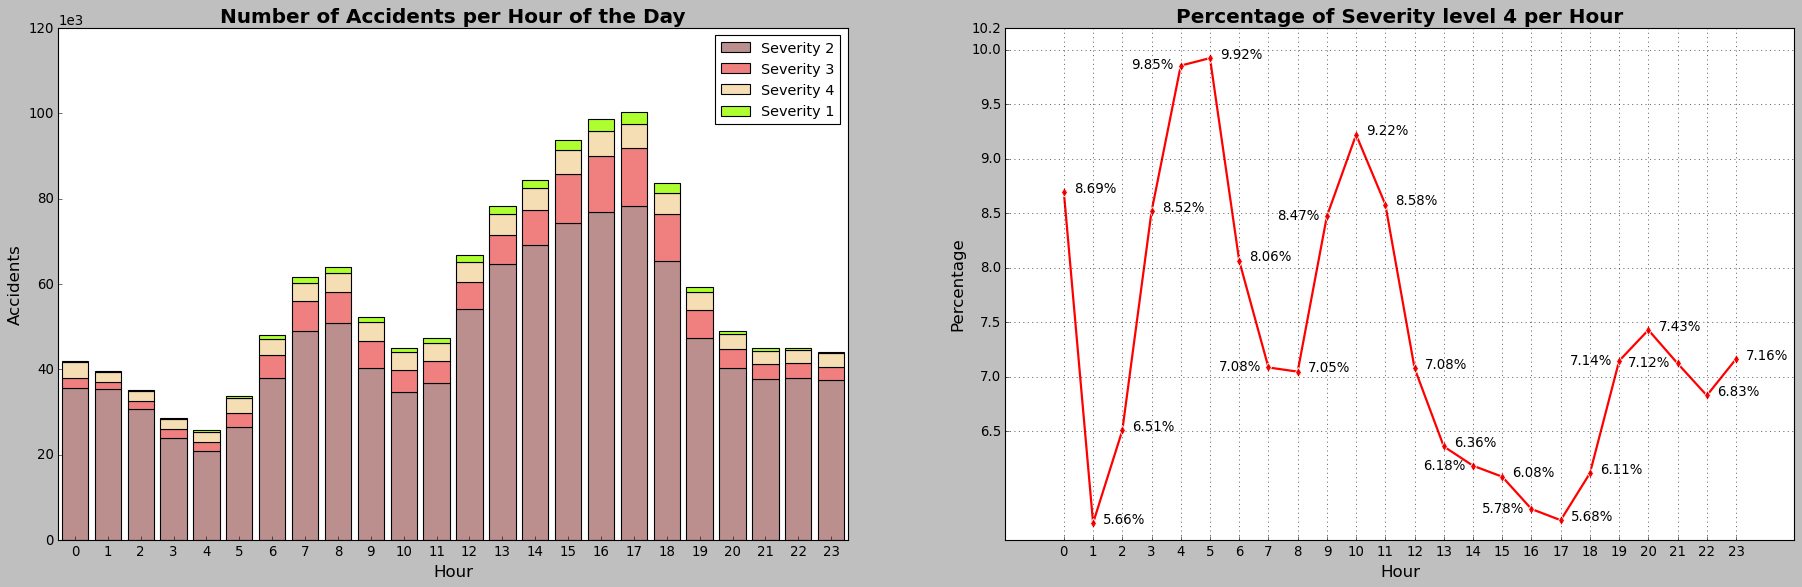

In [25]:
# Create a stacked barplot
hour_gb = [acdnts_per_Hour_2, acdnts_per_Hour_3, acdnts_per_Hour_4, acdnts_per_Hour_1]
labels = [r"Severity 2", r"Severity 3", r"Severity 4", r"Severity 1"]
colors = ["rosybrown", "lightcoral", "wheat", "greenyellow"]
level_4_per_hour = percentages_per_Hour_df.iloc[3]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(28, 8))

# Build the stacked barplot
for i in range(4):
    if i == 0: ax[0].bar(x=hour_gb[i].index, height=hour_gb[i].values, align="center", color=colors[i], edgecolor="black", linewidth=1)
    elif i == 1: ax[0].bar(x=hour_gb[i].index, height=hour_gb[i].values, align="center", color=colors[i], edgecolor="black", linewidth=1, bottom=hour_gb[i-1].values)
    elif i == 2: ax[0].bar(x=hour_gb[i].index, height=hour_gb[i].values, align="center", color=colors[i], edgecolor="black", linewidth=1, bottom=hour_gb[i-1].values+hour_gb[i-2])
    else: ax[0].bar(x=hour_gb[i].index, height=hour_gb[i].values, align="center", color=colors[i], edgecolor="black", linewidth=1, bottom=hour_gb[i-1].values+hour_gb[i-2]+hour_gb[i-3].values)


ax[0].set_title(label="Number of Accidents per Hour of the Day", fontdict={"fontsize": 18, "weight": "bold"})
ax[0].set_ylabel(ylabel="Accidents", fontdict={"fontsize": 15})
ax[0].set_xlabel(xlabel="Hour", fontdict={"fontsize": 15})
ax[0].set_xticks(ticks=np.arange(0, 24, step=1))
ax[0].tick_params(top=False, right=False)
ax[0].set_xlim(left=-0.5, right=23.5)
ax[0].ticklabel_format(axis="y", style="sci", scilimits=(3,3))
ax[0].legend(labels=labels, fontsize=13)

## Build the lineplot
sns.lineplot(x=level_4_per_hour.index, y=level_4_per_hour.values, marker="d", color="red", linewidth=2, ax=ax[1])

# Create the data point labels (percentages on the graph)
i=0
for  x, y in zip(level_4_per_hour.index, level_4_per_hour.values):
    if i in [4, 7, 9, 14, 16, 19, 21]: ax[1].text(x=x-1.7, y=y-0.03, s=f"{y:.2f}%")
    else: ax[1].text(x=x+0.35, y=y, s=f"{y:.2f}%")
    i+=1

ax[1].set_title(label="Percentage of Severity level 4 per Hour", fontdict={"fontsize": 18, "weight": "bold"})
ax[1].set_ylabel(ylabel="Percentage", fontdict={"fontsize": 15})
ax[1].set_xlabel(xlabel="Hour", fontdict={"fontsize": 15})
ax[1].set_yticks(ticks=[6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 10.2])
ax[1].set_xticks(ticks=range(0, 24), labels=hours)
ax[1].tick_params(top=False, right=False)
ax[1].set_xlim(left=-2, right=25)
ax[1].grid()
plt.show()

Οbservations:

* During the day, the number of accidents and also all the severity levels initially increase early in the morning between 6:00-9:00 AM and then raise again in the evening between 3:00 - 6:00 PM. Possible because of the work hours.
* In the evening, between 3:00 - 6:00 PM and particularly at 5:00 PM we have the most-deadliest accident hour, possibly because it is the time that people leaving their jobs and they are more tired compared to morning hours and therefore have less concentration.
* In the morning, between 6:00 - 9:00 AM and particularly at 8:00 AM we have the second most-deadliest accident hour, possibly because people are in hurry to reach their destinations.
* The percentage of accidents with severity level 4, we can see that is very high early at midnight with a peak value at 5:00 AM (9.92%). This is probably due to alcohol-impaired drivers returning home after having fun or celebrating with friends. Then, we see a big drop around the hours 7:00 - 8:00 AM and at 9:00 AM we see a second peak (9.22%) during the hours where people go to work. After 9:00 AM we have a significant drop during working hours and finally a third, much smaller peak occurs at 20:00, possibly because people who work late are very exhausted and less focused when they return home.


##### per Day of the Week

In [26]:
# Find the total amount of accidents per day of the week
tot_acdnts_per_Day = accidents_df.groupby(by=["Start_Day_Week"]).count()["ID"]

# Find the amount of accidents per day of the week and by level of severity
acdnts_per_Day_1 = accidents_df.loc[accidents_df["Severity"] == 1].groupby(by=["Start_Day_Week"]).count()["ID"]
acdnts_per_Day_2 = accidents_df.loc[accidents_df["Severity"] == 2].groupby(by=["Start_Day_Week"]).count()["ID"]
acdnts_per_Day_3 = accidents_df.loc[accidents_df["Severity"] == 3].groupby(by=["Start_Day_Week"]).count()["ID"]
acdnts_per_Day_4 = accidents_df.loc[accidents_df["Severity"] == 4].groupby(by=["Start_Day_Week"]).count()["ID"]

In [27]:
# Calculate the percentages of the total amount of accidents per day
tot_acdnts_per_Day_df = pd.DataFrame(data={"count": tot_acdnts_per_Day.values, "percentage": (tot_acdnts_per_Day.values/tot_acdnts_per_Day.values.sum())*100})
tot_acdnts_per_Day_df

,count,percentage
0,212142,15.473749
1,226244,16.502356
2,231405,16.878802
3,234140,17.078294
4,230708,16.827962
5,127274,9.283432
6,109067,7.955404


In [28]:
# Check the percentages of each level of severity and for each day of the week
percentages_per_Day = {"level 1": [], "level 2": [], "level 3": [], "level 4": []}
day_sev_gb = [acdnts_per_Day_1, acdnts_per_Day_2, acdnts_per_Day_3, acdnts_per_Day_4]
sev_levels = ["level 1", "level 2", "level 3", "level 4"]
days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

for i in range(4):
    for total_count, count_sev in list(zip(tot_acdnts_per_Day.values, day_sev_gb[i].values)):
        percent = (count_sev/total_count)*100
        percentages_per_Day[sev_levels[i]].append(percent)

percentages_per_Day_df = pd.DataFrame.from_dict(data=percentages_per_Day, orient="index", columns=days)
percentages_per_Day_df


,Mon,Tue,Wed,Thu,Fri,Sat,Sun
level 1,2.047214,1.915631,1.935135,2.077390,2.280372,1.751340,1.893332
level 2,80.629484,80.856509,81.257535,80.850346,79.981622,80.945833,79.735392
level 3,10.276136,10.414862,10.264255,10.626975,10.935468,9.265836,9.385974
level 4,7.047167,6.812998,6.543074,6.445289,6.802538,8.036991,8.985303


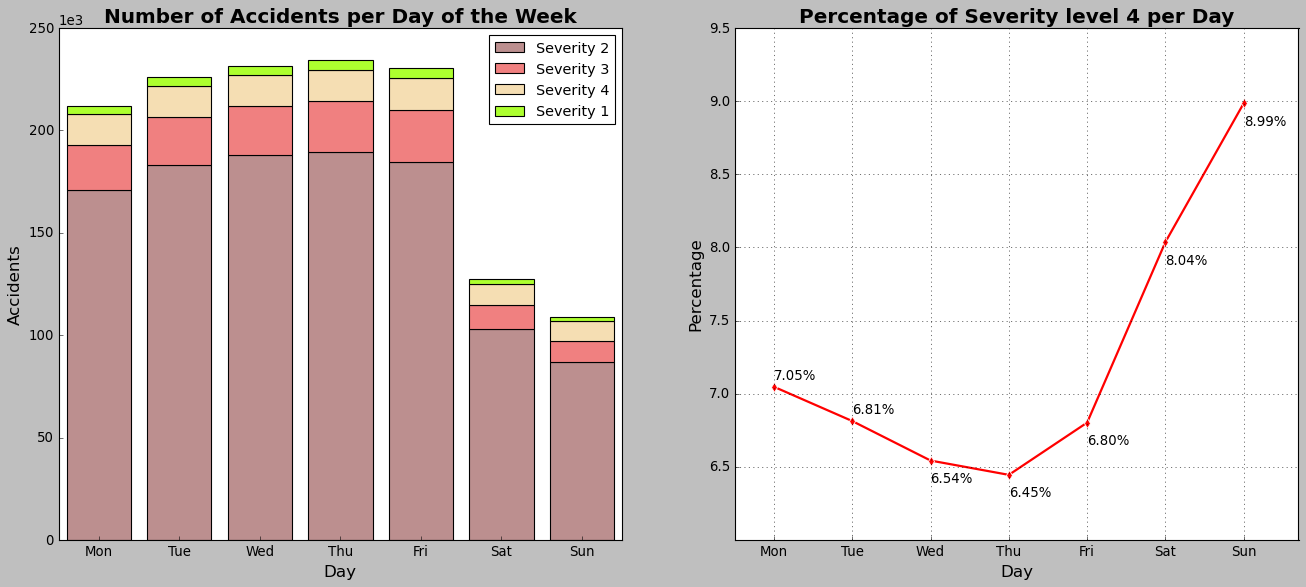

In [29]:
day_gb = [acdnts_per_Day_2, acdnts_per_Day_3, acdnts_per_Day_4, acdnts_per_Day_1]
labels = [r"Severity 2", r"Severity 3", r"Severity 4", r"Severity 1"]
days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
colors = ["rosybrown", "lightcoral", "wheat", "greenyellow"]
level_4_per_day = percentages_per_Day_df.iloc[3]


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Build the stacked barplot
for i in range(4):
    if i == 0: ax[0].bar(x=day_gb[i].index, height=day_gb[i].values, color=colors[i], edgecolor="black", linewidth=1)
    elif i == 1: ax[0].bar(x=day_gb[i].index, height=day_gb[i].values, color=colors[i], edgecolor="black", linewidth=1, bottom=day_gb[i-1].values)
    elif i == 2: ax[0].bar(x=day_gb[i].index, height=day_gb[i].values, color=colors[i], edgecolor="black", linewidth=1, bottom=day_gb[i-1].values+day_gb[i-2])
    else: ax[0].bar(x=day_gb[i].index, height=day_gb[i].values, color=colors[i], edgecolor="black", linewidth=1, bottom=day_gb[i-1].values+day_gb[i-2]+day_gb[i-3].values)


ax[0].set_title(label="Number of Accidents per Day of the Week", fontdict={"fontsize": 18, "weight": "bold"})
ax[0].set_xlabel(xlabel="Day", fontdict={"fontsize": 15})
ax[0].set_ylabel(ylabel="Accidents", fontdict={"fontsize": 15})
ax[0].set_xticks(ticks=range(0, 7), labels=days)
ax[0].ticklabel_format(axis="y", style="sci", scilimits=(3,3))
ax[0].tick_params(top=False, right=False)
ax[0].legend(labels=labels, fontsize=13)
ax[0].set_xlim(left=-0.5, right=6.5)


## Build the lineplot
sns.lineplot(x=level_4_per_day.index, y=level_4_per_day.values, marker="d", color="red", linewidth=2, ax=ax[1])

# Create the data point labels (percentages on the graph)
i=0
for  x, y in zip(level_4_per_day.index, level_4_per_day.values):
    if i == 0 or i == 1: ax[1].text(x=x, y=y+0.05, s=f"{y:.2f}%")
    else: ax[1].text(x=x, y=y-0.15, s=f"{y:.2f}%")
    i+=1

ax[1].set_title(label="Percentage of Severity level 4 per Day", fontdict={"fontsize": 18, "weight": "bold"})
ax[1].set_ylabel(ylabel="Percentage", fontdict={"fontsize": 15})
ax[1].set_xlabel(xlabel="Day", fontdict={"fontsize": 15})
ax[1].set_yticks(ticks=[6.5, 7, 7.5, 8, 8.5, 9, 9.5])
ax[1].set_xticks(ticks=range(0, 7), labels=days)
ax[1].tick_params(top=False, right=False)
ax[1].set_xlim(left=-0.5, right=6.7)
ax[1].grid()

plt.show()

Observations:
* The total amount of accidents, is very high at working days (Mon-Fri), but we see a big drop at the weekend.
* Thursday was the day with the highest no of cases, 234140 in count (~17.1%).
* The accidents with severity level 1, 2, 3 are pretty stable over the week with some small fluctuations.
* However, the percentage of accidents with the highest level of severity (level 4), is high at the weekend with a peak value 8.99% on Sunday. This may be due to longer times spent traveling to weekend getaways, drunk driving, or simply a higher volume of cars out on the roads to enjoy the nice weather. Then decreases by about 2.5% during the working days and then starts increasing again on Friday. 

##### per Month of the Years 2016-2020

In [30]:
acdnts_per_Month_1 = accidents_df.loc[accidents_df["Severity"] == 1].groupby(by=["Start_Month"]).count()["ID"]
acdnts_per_Month_1

Start_Month
2      154
3     4427
4     8851
5     7444
6     6634
7       11
8       42
9        8
10       3
Name: ID, dtype: int64

As you can see above, we dont have observations for accidents with severity level 1 for 3 months (1, 11, 12). So, we will create a new column where we will merge accidents with severity level 1 with the accidents of severity level 2. That is, we will analyze 3 levels of severity. It's reasonable to do this, as we have very few observations of accidents with severity of level 1 in the remaining months.

In [31]:
accidents_df["merge_severity"] = accidents_df["Severity"].replace({1: 2})
accidents_df["merge_severity"].value_counts()

2    1133405
3     141256
4      96319
Name: merge_severity, dtype: int64

In [32]:
# Find the total amount of accidents per month of the year
tot_acdnts_per_Month = accidents_df.groupby(by=["Start_Month"]).count()["ID"]

# Find the amount of accidents per month of the year and by level of severity
acdnts_per_Month_2 = accidents_df.loc[accidents_df["merge_severity"] == 2].groupby(by=["Start_Month"]).count()["ID"]
acdnts_per_Month_3 = accidents_df.loc[accidents_df["merge_severity"] == 3].groupby(by=["Start_Month"]).count()["ID"]
acdnts_per_Month_4 = accidents_df.loc[accidents_df["merge_severity"] == 4].groupby(by=["Start_Month"]).count()["ID"]

In [33]:
# Calculate the percentages of the total amount of accidents per day
tot_acdnts_per_Month_df = pd.DataFrame(data={"count": tot_acdnts_per_Month.values, "percentage": (tot_acdnts_per_Month.values/tot_acdnts_per_Month.values.sum())*100})
tot_acdnts_per_Month_df

,count,percentage
0,76283,5.564122
1,71929,5.246539
2,87289,6.366905
3,100034,7.296532
4,100011,7.294855
5,103821,7.572758
6,45522,3.320399
7,53539,3.905163
8,111048,8.099899
9,166212,12.123590


In [34]:
# Check the percentages of each level of severity and for each month of the years (2016-2020)
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
month_gb = [acdnts_per_Month_2, acdnts_per_Month_3, acdnts_per_Month_4]
percentages_per_Month = {"level 1-2": [], "level 3": [], "level 4": []}
sev_levels = ["level 1-2", "level 3", "level 4"]

for i in range(3):
    for total_count, count_sev in list(zip(tot_acdnts_per_Month.values, month_gb[i].values)):
        percent = (count_sev/total_count)*100
        percentages_per_Month[sev_levels[i]].append(percent)

percentages_per_Month_df = pd.DataFrame.from_dict(data=percentages_per_Month, orient="index", columns=months)
percentages_per_Month_df


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
level 1-2,77.204620,79.237860,75.629232,73.023172,71.409145,70.029185,67.973727,72.573264,86.729162,89.482709,91.601695,92.555759
level 3,13.362086,11.669841,14.803698,17.626007,19.050904,20.742432,18.678881,16.275986,6.688999,5.364234,4.247631,3.709581
level 4,9.433294,9.092299,9.567070,9.350821,9.539951,9.228383,13.347392,11.150750,6.581838,5.153058,4.150674,3.734659


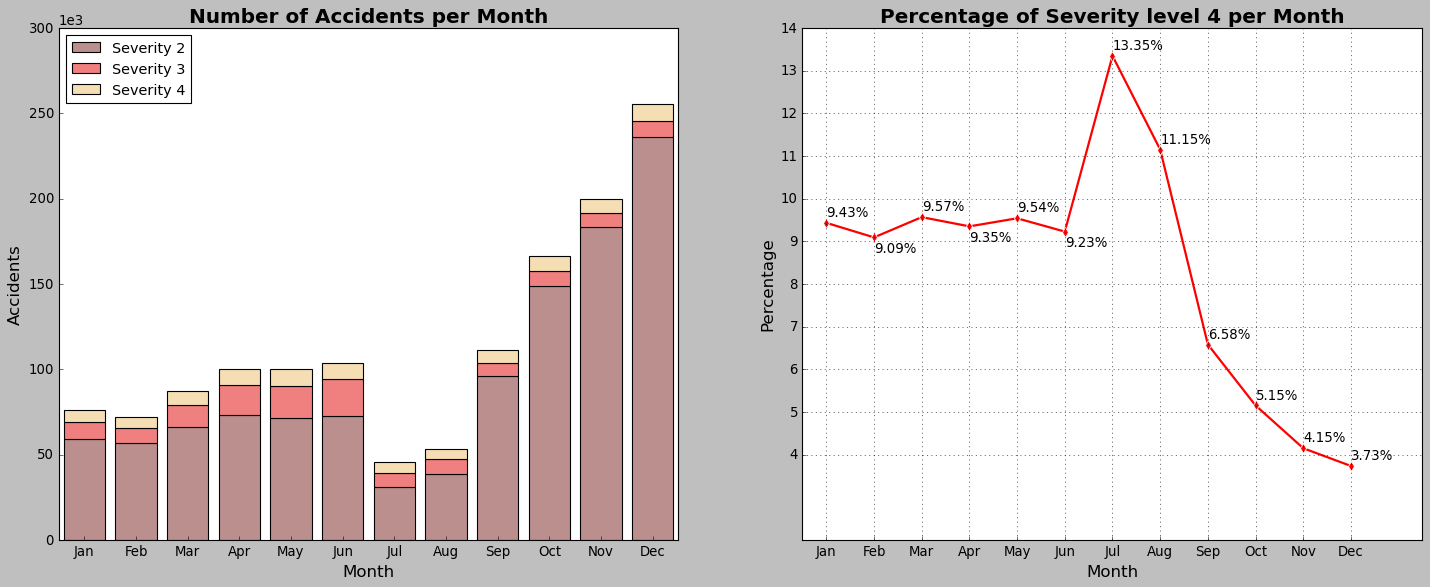

In [35]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
month_gb = [acdnts_per_Month_2, acdnts_per_Month_3, acdnts_per_Month_4]
sev_labels = [r"Severity 2", r"Severity 3", r"Severity 4"]
colors = ["rosybrown", "lightcoral", "wheat"]
level_4_per_month = percentages_per_Month_df.iloc[2]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(22, 8))

# Build a stacked barplot
for i in range(3):
    if i == 0: ax[0].bar(x=month_gb[i].index, height=month_gb[i].values, color=colors[i], edgecolor="black", linewidth=1)
    elif i == 1: ax[0].bar(x=month_gb[i].index, height=month_gb[i].values, color=colors[i], edgecolor="black", linewidth=1, bottom=month_gb[i-1].values)
    else: ax[0].bar(x=month_gb[i].index, height=month_gb[i].values, color=colors[i], edgecolor="black", linewidth=1, bottom=month_gb[i-1].values+month_gb[i-2])


ax[0].set_title(label="Number of Accidents per Month", fontdict={"fontsize": 18, "weight": "bold"})
ax[0].set_ylabel(ylabel="Accidents", fontdict={"fontsize": 15})
ax[0].set_xlabel(xlabel="Month", fontdict={"fontsize": 15})
ax[0].set_xticks(ticks=range(1, 13), labels=months)
ax[0].tick_params(top=False, right=False)
ax[0].set_xlim(left=0.5, right=12.5)
ax[0].ticklabel_format(axis="y", style="sci", scilimits=(3,3))
ax[0].legend(labels=sev_labels, fontsize=13, loc="upper left")

## Build the lineplot
sns.lineplot(x=level_4_per_month.index, y=level_4_per_month.values, marker="d", color="red", linewidth=2, ax=ax[1])

# Create the data point labels (percentages on the graph)
i=0
for  x, y in zip(level_4_per_month.index, level_4_per_month.values):
    if i in [1, 3, 5]: ax[1].text(x=x, y=y-0.35, s=f"{y:.2f}%")
    else: ax[1].text(x=x, y=y+0.15, s=f"{y:.2f}%")
    i+=1


ax[1].set_title(label="Percentage of Severity level 4 per Month", fontdict={"fontsize": 18, "weight": "bold"})
ax[1].set_ylabel(ylabel="Percentage", fontdict={"fontsize": 15})
ax[1].set_xlabel(xlabel="Month", fontdict={"fontsize": 15})
ax[1].set_xticks(ticks=range(0, 12), labels=months)
ax[1].set_yticks(ticks=range(4, 15))
ax[1].set_xlim(left=-0.5, right=12.5)
ax[1].tick_params(top=False, right=False)
ax[1].grid()


plt.show()

Observations:
* The total number of accidents is quite low at the beginning of the year for the months of January and February. Then it goes up a bit until June where we observe a significant drop in summer for the months of July and August. After the summer it increases significantly in the winter with a maximum value in December with 255204 no cases (~18.5%).
* On the other hand, at the beginning of the year accidents with high level of severity (level 4) are a bit stable with some fluctuations until June, where we can see that they increase significantly with a peak value on July (13.35%). After August, we see a big drop during the remaining months. 

##### over the Years 2016-2020

In [36]:
# Find the total amount of accidents per month of the year
tot_acdnts_per_Year = accidents_df.groupby(by=["Start_Year"]).count()["ID"]

# Find the amount of accidents per month of the year and by level of severity
acdnts_per_Year_2 = accidents_df.loc[accidents_df["merge_severity"] == 2].groupby(by=["Start_Year"]).count()["ID"]
acdnts_per_Year_3 = accidents_df.loc[accidents_df["merge_severity"] == 3].groupby(by=["Start_Year"]).count()["ID"]
acdnts_per_Year_4 = accidents_df.loc[accidents_df["merge_severity"] == 4].groupby(by=["Start_Year"]).count()["ID"]

In [37]:
# Calculate the percentages of the total amount of accidents per day
tot_acdnts_per_Year_df = pd.DataFrame(data={"count": tot_acdnts_per_Year.values, "percentage": (tot_acdnts_per_Year.values/tot_acdnts_per_Year.values.sum())*100})
tot_acdnts_per_Year_df

,count,percentage
0,104569,7.627318
1,139590,10.181768
2,133674,9.750252
3,241925,17.646136
4,751222,54.794527


In [38]:
# Check the percentages of each level of severity and for each month of the years (2016-2020)
years = [2016, 2017, 2018, 2019, 2020]
year_gb = [acdnts_per_Year_2, acdnts_per_Year_3, acdnts_per_Year_4]
percentages_per_Year = {"level 1-2": [], "level 3": [], "level 4": []}
sev_levels = ["level 1-2", "level 3", "level 4"]

for i in range(3):
    for total_count, count_sev in list(zip(tot_acdnts_per_Year.values, year_gb[i].values)):
        percent = (count_sev/total_count)*100
        percentages_per_Year[sev_levels[i]].append(percent)

percentages_per_Year_df = pd.DataFrame.from_dict(data=percentages_per_Year, orient="index", columns=years)
percentages_per_Year_df


,2016,2017,2018,2019,2020
level 1-2,72.394304,68.292141,66.70856,79.179084,90.738557
level 3,17.386606,18.573680,18.61843,11.691227,5.853929
level 4,10.219090,13.134179,14.67301,9.129689,3.407515


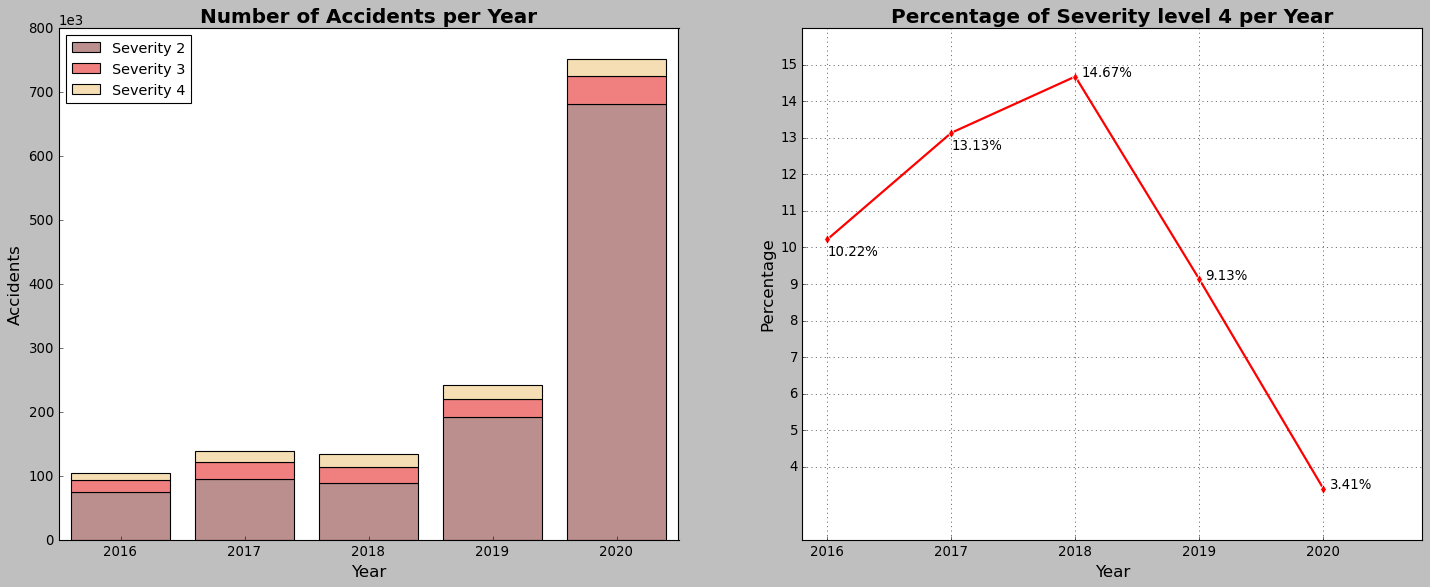

In [39]:
year_gb = [acdnts_per_Year_2, acdnts_per_Year_3, acdnts_per_Year_4]
sev_labels = [r"Severity 2", r"Severity 3", r"Severity 4"]
level_4_per_year = percentages_per_Year_df.iloc[2]
colors = ["rosybrown", "lightcoral", "wheat"]
years = ["2016", "2017", "2018", "2019", "2020"]


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(22, 8))

# Build a stacked barplot
for i in range(3):
    if i == 0: ax[0].bar(x=year_gb[i].index, height=year_gb[i].values, color=colors[i], edgecolor="black", linewidth=1)
    elif i == 1: ax[0].bar(x=year_gb[i].index, height=year_gb[i].values, color=colors[i], edgecolor="black", linewidth=1, bottom=year_gb[i-1].values)
    else: ax[0].bar(x=year_gb[i].index, height=year_gb[i].values, color=colors[i], edgecolor="black", linewidth=1, bottom=year_gb[i-1].values+year_gb[i-2])


ax[0].set_title(label="Number of Accidents per Year", fontdict={"fontsize": 18, "weight": "bold"})
ax[0].set_ylabel(ylabel="Accidents", fontdict={"fontsize": 15})
ax[0].set_xlabel(xlabel="Year", fontdict={"fontsize": 15})
ax[0].set_xticks(ticks=range(2016, 2021), labels=years)
ax[0].tick_params(top=False, right=False)
ax[0].set_xlim(left=2015.5, right=2020.5)
ax[0].ticklabel_format(axis="y", style="sci", scilimits=(3,3))
ax[0].legend(labels=sev_labels, fontsize=13, loc="upper left")

# Build the lineplot
sns.lineplot(x=level_4_per_year.index, y=level_4_per_year.values, marker="d", color="red", linewidth=2, ax=ax[1])

# Create the data point labels (percentages on the graph)
i=0
for  x, y in zip(level_4_per_year.index, level_4_per_year.values):
    if i in [2, 3, 4]: ax[1].text(x=x+0.05, y=y, s=f"{y:.2f}%")
    else: ax[1].text(x=x, y=y-0.45, s=f"{y:.2f}%")
    i+=1


ax[1].set_title(label="Percentage of Severity level 4 per Year", fontdict={"fontsize": 18, "weight": "bold"})
ax[1].set_ylabel(ylabel="Percentage", fontdict={"fontsize": 15})
ax[1].set_xlabel(xlabel="Year", fontdict={"fontsize": 15})
ax[1].set_xticks(ticks=range(2016, 2021), labels=years)
ax[1].set_yticks(ticks=range(4, 16))
ax[1].set_xlim(left=2015.8, right=2020.8)
ax[1].tick_params(top=False, right=False)
ax[1].grid()


plt.show()

Observations:
* The total amount of accidents is a little bit stable over the years 2016-2018, but from 2019 starts increasing significantly and in 2020 we have a peak value. The total amount of accidents in 2020 was 751222 (54%).
* The percentage of accidents with a severity level of 4 increases from the year 2016 with a peak value in 2018 (14.67%). Then we see a big drop to 3.41% in the year 2020. This doesn't mean that the amount of accidents with severity level 4 reduced. It just means that over all the accidents only the 3.41% were accidents with severity level 4. As we see at the left barplot, we have a huge amount of total accidents with all levels of severity in 2020.  

<h3><font color = "orange">Analysis of the effect of weather conditions on road accidents.</font></h3>

In [40]:
accidents_df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Street,Side,City,County,State,Zipcode,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_Day_Week,Start_Month,Start_Date,Start_Hour,Start_Year,merge_severity
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Outerbelt E,1,Dublin,Franklin,OH,43017,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,2,2016-02-08,0,2016,3
1,A-2716605,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,I-75 S,1,Cincinnati,Hamilton,OH,45217,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,1,1,1,1,0,2,2016-02-08,7,2016,3
2,A-2716606,2,2016-02-08 08:16:57,2016-02-08 14:16:57,39.063240,-84.032430,39.067310,-84.058510,1.427,State Route 32,1,Williamsburg,Clermont,OH,45176,US/Eastern,KI69,2016-02-08 08:16:00,35.6,29.2,100.0,29.66,10.0,WSW,8.1,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,1,1,1,1,0,2,2016-02-08,8,2016,2
3,A-2716607,2,2016-02-08 08:16:57,2016-02-08 14:16:57,39.067080,-84.058550,39.063020,-84.032540,1.423,State Route 32,1,Batavia,Clermont,OH,45103,US/Eastern,KI69,2016-02-08 08:16:00,35.6,29.2,100.0,29.66,10.0,WSW,8.1,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,1,1,1,1,0,2,2016-02-08,8,2016,2
4,A-2716608,2,2016-02-08 08:15:41,2016-02-08 14:15:41,39.775650,-84.186030,39.772750,-84.188050,0.227,I-75 S,1,Dayton,Montgomery,OH,45404,US/Eastern,KFFO,2016-02-08 08:18:00,33.8,NaN,100.0,29.63,3.0,SW,2.3,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,1,1,1,1,0,2,2016-02-08,8,2016,2


##### Find the top 10 weather conditions based on the number of accidents that occurred with these conditions.

In [41]:
# Find the top 10 weather conditions, generally
top_10_wc = accidents_df.groupby(by="Weather_Condition").count().sort_values(by="ID", ascending=False)["ID"][:10]

# Find the top 10 weather conditions based on the level of severity
top_10_wc_sev_1 = accidents_df.loc[accidents_df["Severity"] == 1].groupby(by=["Weather_Condition"]).count().sort_values(by="ID", ascending=False)["ID"][:10]
top_10_wc_sev_2 = accidents_df.loc[accidents_df["Severity"] == 2].groupby(by=["Weather_Condition"]).count().sort_values(by="ID", ascending=False)["ID"][:10]
top_10_wc_sev_3 = accidents_df.loc[accidents_df["Severity"] == 3].groupby(by=["Weather_Condition"]).count().sort_values(by="ID", ascending=False)["ID"][:10]
top_10_wc_sev_4 = accidents_df.loc[accidents_df["Severity"] == 4].groupby(by=["Weather_Condition"]).count().sort_values(by="ID", ascending=False)["ID"][:10]

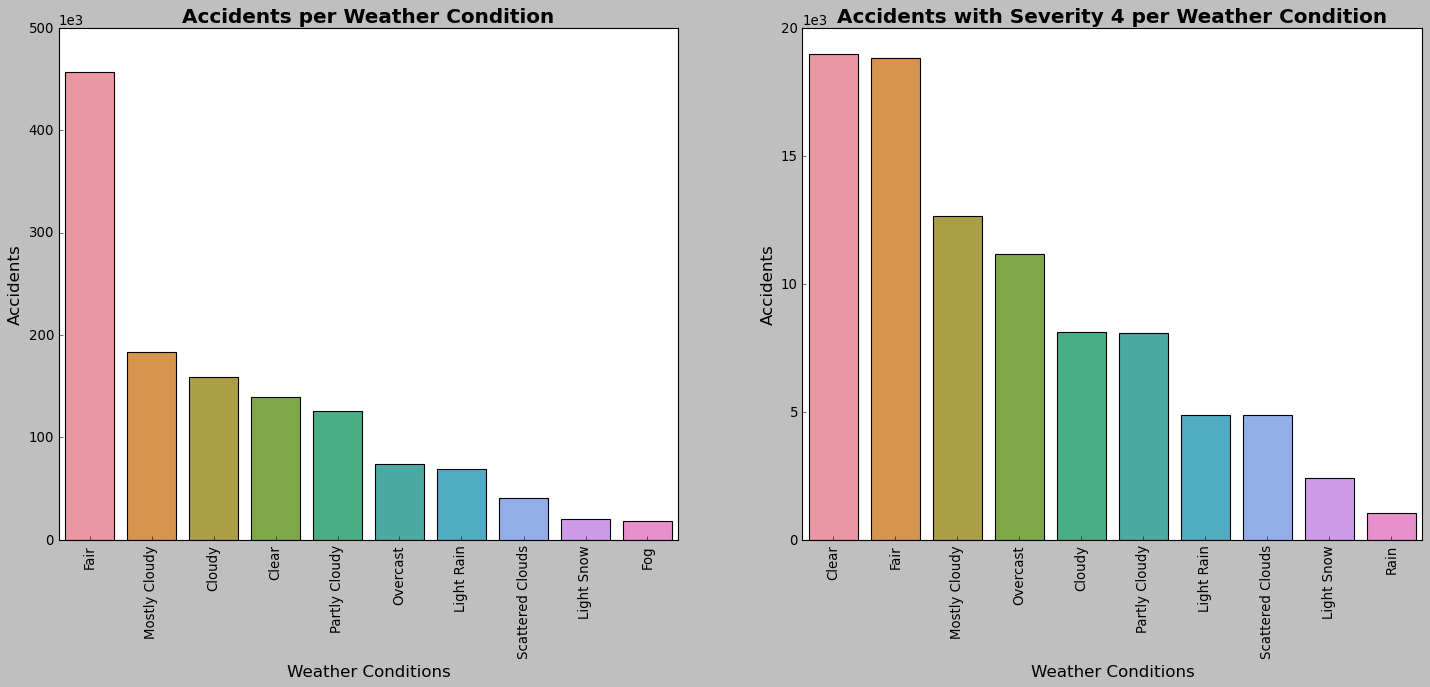

In [42]:
labels = ["Accidents per Weather Condition", "Accidents with Severity 4 per Weather Condition"]
dfs = [top_10_wc, top_10_wc_sev_4]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(22, 8))
# Barplots
for i in range(2):
    sns.barplot(x=dfs[i].index, y=dfs[i].values, edgecolor="black", linewidth=1, ax=ax[i])
    ax[i].set_title(label=labels[i], fontdict={"fontsize": 18, "weight": "bold"})
    ax[i].set_xlabel(xlabel="Weather Conditions", fontdict={"fontsize": 15})
    ax[i].set_ylabel(ylabel="Accidents", fontdict={"fontsize": 15})
    ax[i].ticklabel_format(axis="y", style="sci", scilimits=(3,3))
    ax[i].tick_params(top=False, right=False)
    ax[i].set_xticks(ticks=range(0, 10), labels=dfs[i].index.tolist(), rotation=90)

plt.show()

Observations:
* From the above barplots we can conclude that the weather condition didn't have much effect on the severity of accidents or whether an accident will occur or not. Most of the times the weather was Clear and Fair. 

<h3><font color = "orange">Map Visualizations</font></h3>

In [43]:
accidents_df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Street,Side,City,County,State,Zipcode,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_Day_Week,Start_Month,Start_Date,Start_Hour,Start_Year,merge_severity
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Outerbelt E,1,Dublin,Franklin,OH,43017,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,2,2016-02-08,0,2016,3
1,A-2716605,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,I-75 S,1,Cincinnati,Hamilton,OH,45217,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,1,1,1,1,0,2,2016-02-08,7,2016,3
2,A-2716606,2,2016-02-08 08:16:57,2016-02-08 14:16:57,39.063240,-84.032430,39.067310,-84.058510,1.427,State Route 32,1,Williamsburg,Clermont,OH,45176,US/Eastern,KI69,2016-02-08 08:16:00,35.6,29.2,100.0,29.66,10.0,WSW,8.1,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,1,1,1,1,0,2,2016-02-08,8,2016,2
3,A-2716607,2,2016-02-08 08:16:57,2016-02-08 14:16:57,39.067080,-84.058550,39.063020,-84.032540,1.423,State Route 32,1,Batavia,Clermont,OH,45103,US/Eastern,KI69,2016-02-08 08:16:00,35.6,29.2,100.0,29.66,10.0,WSW,8.1,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,1,1,1,1,0,2,2016-02-08,8,2016,2
4,A-2716608,2,2016-02-08 08:15:41,2016-02-08 14:15:41,39.775650,-84.186030,39.772750,-84.188050,0.227,I-75 S,1,Dayton,Montgomery,OH,45404,US/Eastern,KFFO,2016-02-08 08:18:00,33.8,NaN,100.0,29.63,3.0,SW,2.3,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,1,1,1,1,0,2,2016-02-08,8,2016,2


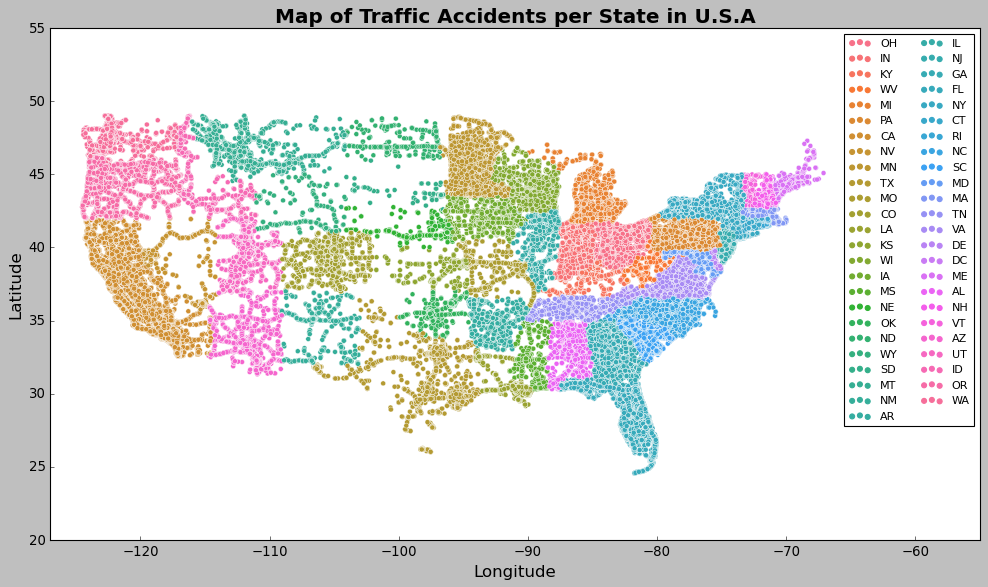

In [44]:
# Accidents per state in U.S.A - Scatter Map 
plt.figure(figsize=(15, 8))
sns.scatterplot(data=accidents_df, x="Start_Lng", y="Start_Lat", hue="State")

plt.title(label="Map of Traffic Accidents per State in U.S.A", fontdict={"fontsize": 18, "weight": "bold"})
plt.xlabel(xlabel="Longitude", fontdict={"fontsize": 15})
plt.ylabel(ylabel="Latitude", fontdict={"fontsize": 15})
plt.xlim(left=-127, right=-55)

plt.tick_params(top=False, right=False)

plt.legend(fontsize=10, loc="best", ncol=2)
plt.show()

It is clear that the accidents reported through the years 2016-2020 occurred over a large number of locations.

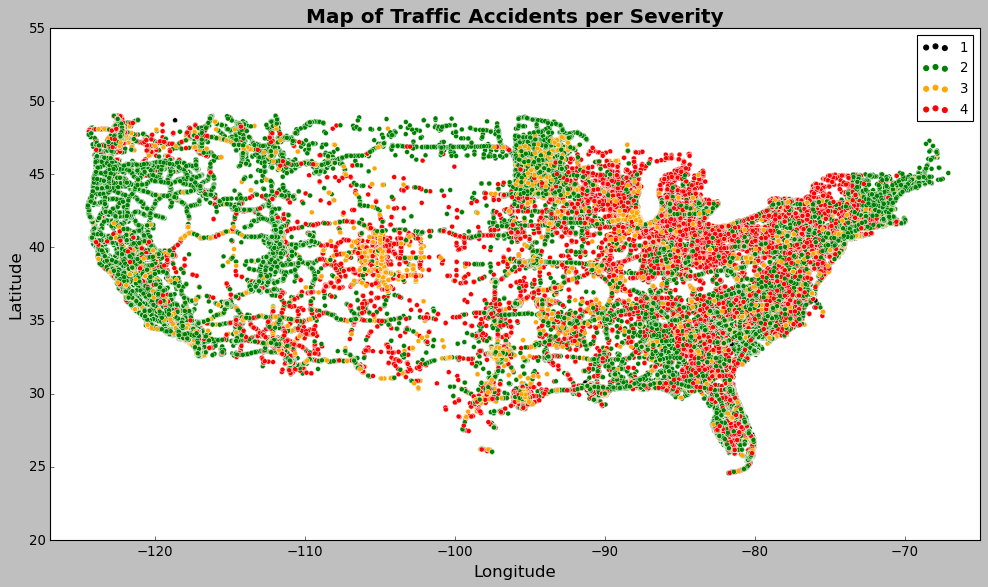

In [45]:
labels = ["lvl 1", "lvl 2", "lvl 3", "lvl 4"]
colors = ["black", "green", "orange", "red"]
# Accidents per severity in U.S.A - Scatter Map 
plt.figure(figsize=(15, 8))
sns.scatterplot(data=accidents_df, x="Start_Lng", y="Start_Lat", hue="Severity", palette=colors)

plt.title(label="Map of Traffic Accidents per Severity", fontdict={"fontsize": 18, "weight": "bold"})
plt.xlabel(xlabel="Longitude", fontdict={"fontsize": 15})
plt.ylabel(ylabel="Latitude", fontdict={"fontsize": 15})
plt.xlim(left=-127, right=-65)

plt.tick_params(top=False, right=False)

plt.legend(fontsize=12, loc="best")
plt.show()

The above plot is a little bit messy. So, lets clear things out by plotting accidents incidents  by each level of severity seperatly.

In [46]:
sev_1 = accidents_df.loc[accidents_df["Severity"] == 1]
sev_2 = accidents_df.loc[accidents_df["Severity"] == 2]
sev_3 = accidents_df.loc[accidents_df["Severity"] == 3]
sev_4 = accidents_df.loc[accidents_df["Severity"] == 4]

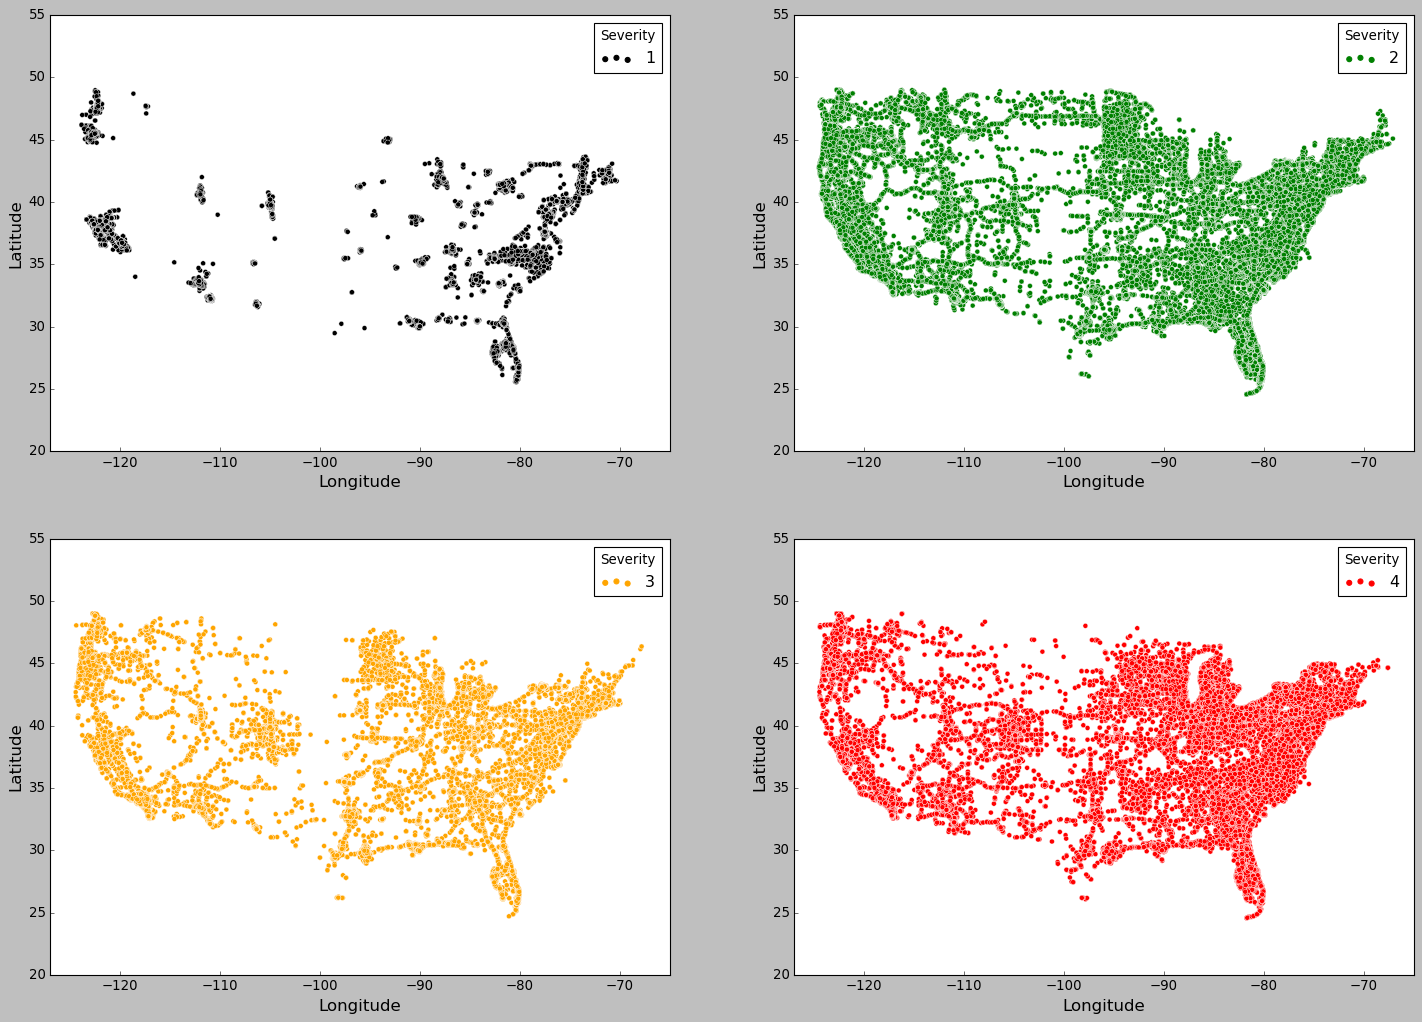

In [47]:
sev_dfs = [sev_1, sev_2, sev_3, sev_4]
colors = ["black", "green", "orange", "red"]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(22, 15))

for i in range(2):
    sns.scatterplot(data=sev_dfs[i], x="Start_Lng", y="Start_Lat", hue="Severity", palette=[colors[i]], ax=ax[0][i])
    ax[0][i].set_xlabel(xlabel="Longitude", fontdict={"fontsize": 15})
    ax[0][i].set_ylabel(ylabel="Latitude", fontdict={"fontsize": 15})
    ax[0][i].set_xlim(left=-127, right=-65)
    ax[0][i].tick_params(top=False, right=False)

for i in range(2):
    sns.scatterplot(data=sev_dfs[2:][i], x="Start_Lng", y="Start_Lat", hue="Severity", palette=[colors[2:][i]], ax=ax[1][i])
    ax[1][i].set_xlabel(xlabel="Longitude", fontdict={"fontsize": 15})
    ax[1][i].set_ylabel(ylabel="Latitude", fontdict={"fontsize": 15})
    ax[1][i].set_xlim(left=-127, right=-65)
    ax[1][i].tick_params(top=False, right=False)

plt.show()


Observations:
* From the above scatter plots we can see that most accidents have occurred in the eastern and western United States, which is consistent with the fact that most accidents took place in areas with Eastern Standard and Pacific time zones.

<h2><font color = "green">Insights</font></h2>

General Insights:
* There were 751222 recorded traffic accidents in 2020, with 25598 (3.41%) of these considered accidents with a severity level 4.
* Accidents with severity level 4 tend to occur most in clear and fair weather conditions. So the weather conditions doesn't play significant role.

Insights by location:
* The most road accident-prone areas are located in the eastern and western parts of the United States and within the Eastern Standard and Pacific Standard time zones.
* The state with the most traffic accidents is by far the state of California (CA), which is also the most populous state. The second state with the most accidents is the state of Florida (FL).
* The top 2 cities with almost equal number of accidents are Los Angeles and Miami, which in turn belong to the states of California and Florida, respectively.
* The top 2 most dangerous road streets are the I-5 (in the state of California ), and the I-95 (in the state of Florida).

Insights by time:
* The number of accidents have an increasing trend over the years 2016-2020.
* Traffic accidents were low at the beginning of the year, declining in July and August and followed by a rapid increase in winter, culminating in December.
* Severity level 4 traffic accidents peaked in July, coinciding with the US 4th of July (Independence Day) holidays, followed by a sharp drop in August.
* In general, traffic accidents are lowest on a Monday and increase through the working week, peaking on Thursdays - for accidents with severity level 4 theb peak is on Sunday.
* In general, traffic accidents peak once at the morning 7:00-8:00 AM and then a bigger peak on evening at 5:00 PM - for accidents with severity level 4 the peak is at the midnight 4:00-5:00 AM.

<h2><font color = "green">Further Investigation</font></h2>

In this research we can further investigate other features which can effect whether an accident will occur or not, or what its severity will be. Some interesting features worth investigate are: wind speed and direction, humidity, and precipitation.

<h2><font color = "green">Policy Initiatives</font></h2>

1. Some interesting ideas in order to reduce the number of accidents could be summarized by two different types of policy initiatives. Firstly, policies that aim to reduce the overall traffic accidents, and thereby, indirect reduce the high severity - fatal accidents. For example, some of these policies could be like:
* Implementation of increased traffic safety controls like seat belt enforcement or lower speed enforcment. This can be implement for the working days during rush hours - 7:00-8:00 AM and 4:00-5:00 PM - and especially on Thursdays due to the higher rates of traffic accidents.
* Increase of safety messages in the eastern and western parts of the U.S, and generally in states, cities, and roads where the traffic accident rates are highest.
2. Secondly, more targeted policies can be designed in order to reduce the high severity - fatal accidents, such as:
* Implementation of increased traffic safety controls like seat belt enforcement, lower speed enforcment and intoxicated driving intervention. Especially for weekends where the fatal accidents raise significantly. 
* Targeted safety messaging in cities and regions that have the highest proportion of fatal accident rates.